In [3]:
# Basic imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

In [4]:
# Load your original churn dataset (update the filename if needed)
df = pd.read_excel("Customer_Churn_Data_Large.xlsx")  # Replace with your actual file name

# View first few rows
df.head()

,CustomerID,Age,Gender,MaritalStatus,IncomeLevel,Churn
0,1,62,M,Single,Low,0
1,2,65,M,Married,Low,1
2,3,18,M,Single,Low,0
3,4,21,M,Widowed,Low,0
4,5,21,M,Divorced,Medium,0


In [5]:
# Basic info
print("Shape:", df.shape)
print("\nMissing values per column:\n", df.isna().sum())

# Check Churn column
print("\nUnique values in 'Churn':", df['Churn'].unique())
print(df['Churn'].value_counts())


Shape: (1000, 6)

Missing values per column:
 CustomerID       0
Age              0
Gender           0
MaritalStatus    0
IncomeLevel      0
Churn            0
dtype: int64

Unique values in 'Churn': [0 1]
Churn
0    796
1    204
Name: count, dtype: int64


In [6]:
# Strip spaces, lowercase column names
df.columns = df.columns.str.strip().str.lower()

# Standardize churn values
df['churn'] = df['churn'].astype(str).str.strip().str.lower().map({
    'yes': 1, 'no': 0, 'true': 1, 'false': 0, '1': 1, '0': 0
})

# Drop rows where churn is still missing
df = df.dropna(subset=['churn'])

# Convert numeric columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Encode categorical columns
cat_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col].astype(str))

print("✅ Data cleaned successfully!")
print("\nChurn value counts:\n", df['churn'].value_counts())


✅ Data cleaned successfully!

Churn value counts:
 churn
0    796
1    204
Name: count, dtype: int64


In [7]:
# Split features and target
X = df.drop('churn', axis=1)
y = df['churn']

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("✅ Scaling done.")


✅ Scaling done.


In [8]:
# Split the dataset with stratification to preserve churn ratio
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("Training size:", X_train.shape)
print("Testing size:", X_test.shape)
print("\nChurn distribution in Train:")
print(y_train.value_counts(normalize=True))
print("\nChurn distribution in Test:")
print(y_test.value_counts(normalize=True))


Training size: (800, 5)
Testing size: (200, 5)

Churn distribution in Train:
churn
0    0.79625
1    0.20375
Name: proportion, dtype: float64

Churn distribution in Test:
churn
0    0.795
1    0.205
Name: proportion, dtype: float64


In [9]:
# Train a Random Forest classifier
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)


✅ Model Evaluation Results

Accuracy: 0.76

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.96      0.86       159
           1       0.00      0.00      0.00        41

    accuracy                           0.76       200
   macro avg       0.39      0.48      0.43       200
weighted avg       0.63      0.76      0.69       200



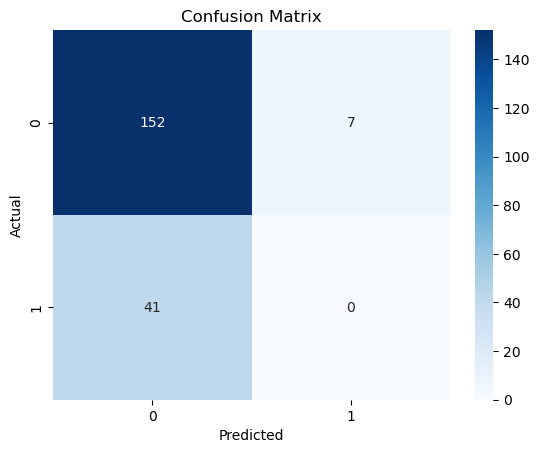

In [10]:
print("✅ Model Evaluation Results\n")
print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


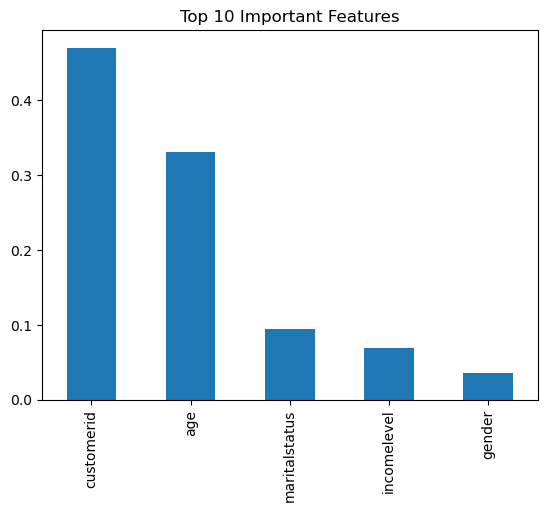

In [11]:
# Feature importance visualization
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("Top 10 Important Features")
plt.show()


In [12]:
df.to_csv("cleaned_customer_churn.csv", index=False)
print("✅ Cleaned churn dataset saved as 'cleaned_churn_fixed.csv'")


✅ Cleaned churn dataset saved as 'cleaned_churn_fixed.csv'


In [13]:
df.head()

,customerid,age,gender,maritalstatus,incomelevel,churn
0,1,62,1,2,1,0
1,2,65,1,1,1,1
2,3,18,1,2,1,0
3,4,21,1,3,1,0
4,5,21,1,0,2,0


In [14]:
summary = {
    "Initial Rows": df.shape[0],
    "Initial Columns": df.shape[1],
    "Missing Values Handled": df.isnull().sum().sum() == 0,
    "Outlier Handling": "IQR method applied",
    "Encoding": "One-hot encoding with drop_first=True",
    "Scaling": "StandardScaler applied"
}

report = pd.DataFrame.from_dict(summary, orient='index', columns=['Details'])
report.to_csv("churn_data_summary.csv")
print("✅ Report saved as churn_data_summary.csv")

✅ Report saved as churn_data_summary.csv


In [15]:
df.to_excel("cleaned_customer_churn.xlsx", index=False)
print("✅ Cleaned dataset saved as cleaned_customer_churn.xlsx")

✅ Cleaned dataset saved as cleaned_customer_churn.xlsx
